# 1. Install dependencies and setup

In [15]:
!pip install tensorflow opencv-python matplotlib 


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        3.7.1
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
caer                         2.0.8
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [18]:
import cv2
import imghdr

In [41]:
data_directory = 'Documents/Image Classifier/Data'

In [42]:
image_exists = ['jpeg', 'jpg', 'bmp', 'png']

In [43]:
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try:
            img = cv2.imread(image_path)
            typ = imghdr.what(image_path)
            if typ not in image_exists:
                print('Image not in the existing list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [45]:
import numpy as np 
from matplotlib import pyplot as plt

In [47]:
data = tf.keras.utils.image_dataset_from_directory('Documents/Image Classifier/Data')

Found 263 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [62]:
batch = data_iterator.next()

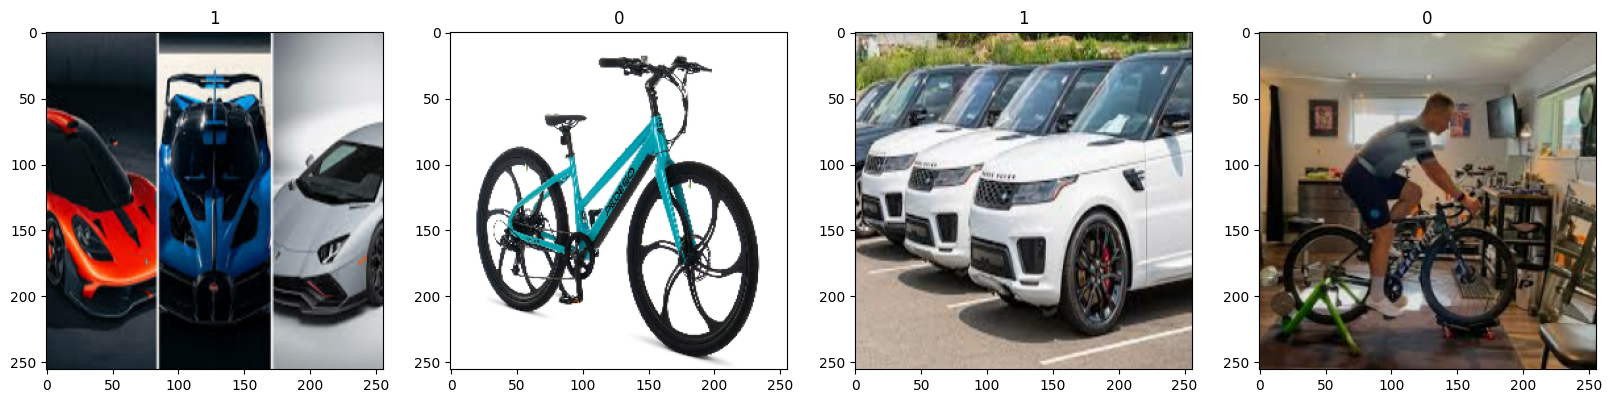

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [64]:
batch[0].max()

255.0

# 3. Scale Data

In [65]:
#Preprocessing step to normalize pixel values to the range of 0 to 1 
data = data.map(lambda x,y: (x/255, y))

In [67]:
data.as_numpy_iterator().next()

(array([[[[3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          ...,
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03]],
 
         [[3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          ...,
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03]],
 
         [[3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
          ...,
          [3.90618993e-03, 3.90618993e-03, 3.9061

In [70]:
batch[].min()

0